In [0]:
!pip install -q scipy

# ODE Solver

In [0]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Population model

test example to understand syntax

In [0]:
def populationGrowth(t, P):
  r = 1
  K = 1000
  return r*P*(1-P/K)

In [17]:
t0 = 0
t1 = 10 # t input

tspan = np.linspace(t0, t1, 100)
P0 = 120

pSol = np.zeros((len(tspan), 1))
pSol[0, :] = P0

r = integrate.ode(populationGrowth).set_integrator("dopri5") #explicit runge-kuta method in order 4(5) most close to MATLAB ode45
r.set_initial_value(P0, t0)

In [0]:
for i in range(1, tspan.size):
  pSol[i, :] = r.integrate(tspan[i]) # get one more value, add it to the array
  if not r.successful():
    raise RuntimeError("Could not integrate")

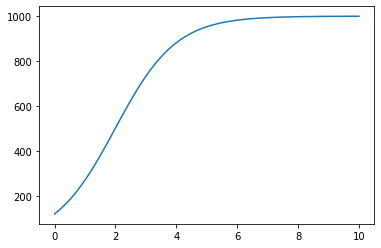

In [19]:
plt.plot(tspan, pSol)
plt.show()

# Events

use solve_ivp

In [0]:
def event(t, P):
  return P[0] - 145

In [0]:
tspan = (0, 5)
P0 = 10

In [59]:
event.terminal = True
sol = integrate.solve_ivp(populationGrowth, tspan, np.array([P0]), events=[event], method='RK45', max_step=1e-3, atol=1e-4, rtol=1e-3)
print(sol.t_events)

[array([2.82075212])]


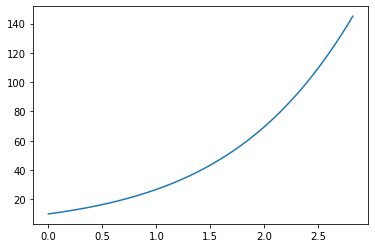

In [60]:
plt.plot(sol.t, sol.y[0])
plt.show()